<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw6_is_it_integral_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we begin by finding the CDF of $p_{1}$ where $p_{1}$ is defined as

$$p_{1} = \frac{1}{C}(2\cdot I_{(0,1/100]}(x)+1\cdot I_{(1/100,1)}(x))$$

Where $C = \frac{101}{100}$.

The CDF $F$ of a pdf $p(x)$ is defined as

$$F(x) = \int_{-\infty}^{x}p(x)dx$$

For our pdf, the integral is $0$ for $x \leq 0$. Thus, we can rewrite this as

$$F_{1}(x) = \int_{0}^{x}p_{1}(x)dx$$

The $\frac{1}{C}=\frac{100}{101}$ term is constant and can come outside:

$$= \frac{1}{C}\int_{0}^{x}2\cdot I_{(0,1/100]}(x)+1\cdot I_{(1/100,1)}(x)dx$$

If $x \leq \frac{1}{100}$, then the second indicator is $0$:

$$= \frac{1}{C} \int_{0}^{x(\leq0.01)} 2\cdot I_{(0,1/100]}(x)dx = 2x\frac{1}{C}|^{x}_{0}$$

$$=\frac{200}{101}x, x\leq \frac{1}{100}$$

If $x \geq \frac{1}{100}$, then the first indicator will evaluate to $2 \cdot \frac{100}{101} \cdot \frac{1}{100}=\frac{2}{101}$

The second indicator in the integral then evaluates as

$$\frac{1}{C}\int_{\frac{1}{100}}^{x}1\cdot I_{(1/100,1)}(x)dx$$

$$ = \frac{1}{C} \cdot x\mid^{x}_{\frac{1}{100}} = \frac{1}{C} \cdot [x - \frac {1}{100}]$$

$$ = x \cdot \frac{100}{101}  - \frac{100}{101} \cdot \frac{1}{100} = \frac{100}{101}x - \frac{1}{101} = \frac{100x - 1}{101}$$

For $x \geq \frac{1}{100}$ we then have to add $\frac{2}{101}$ to the above  since that is also contained therein:

$$\rightarrow \frac{100x-1}{101} + \frac{2}{101} = \frac{100x+1}{101}, x\geq \frac{1}{100}$$



Thus our CDF is $F_{1}(x) = $

$$F_{1}(x) = 0, x \leq 0$$

$$F_{1}(x) = \frac{200x}{101}, 0\leq x\leq \frac{1}{100}$$

$$F_{1}(x) = \frac{100x + 1}{101}, \frac{1}{100}\leq x \leq 1 $$

$$F_{1}(x) = 1, x > 1$$


We can verify that this is $0$ for $x = 0$ and $1$ for $x = 1$.

Now we need to find the inverse, $F_{1}^{-1}(x)$. To do this for the two non-constant values of $F$, we simply swap the location of $y = F(x)$ and $x$ and solve the new equation in terms of $y$. Thus for $0\leq x\leq \frac{1}{100}$ we have

$$ x = \frac{200}{101}y \rightarrow y = \frac{101}{200}x$$

$$\rightarrow F_{1}^{-1}(x) = \frac{101}{200}x, 0 \leq x \leq \frac{2}{101}$$

Note that the interval on which this x is valid is different, because now we are considering the range of $F(x)$ instead of $x$ itself. For the other segment, we have

$$x = \frac{100y}{101} + \frac{1}{101} \rightarrow x - \frac{1}{101} = \frac{100}{101}y$$

$$\rightarrow y = \frac{101}{100}(x - \frac{1}{101}) = \frac{101}{100}x - \frac{1}{100} = \frac{101x - 1}{100}$$

$$\rightarrow F_{1}^{-1}(x) = \frac{101x - 1}{100}, \frac{2}{101} < x \leq 1$$

Therefore, our inverse $F_{1}^{-1}(x)$ is

$$F_{1}^{-1}(x) =\frac{101}{200}x, 0\leq x\leq \frac{2}{101}$$

$$F_{1}^{-1}(x) = \frac{101x - 1}{100}, \frac{2}{101} \leq x \leq 1$$

Now, begin running actual code. Import modules as standard.

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

Define the inverse transform code.

In [0]:
def inverse_transform_sampling(Finv,n):
  # Create a vector to store f-inverse outputs.
  x = np.zeros((n,1))
  
  for i in range(n):
    # Generate i.i.d. U(0,1) random variables.
    y = np.random.uniform()
    # For each y, compute the F-inverse.
    x[i,0] = Finv(y)
  
  return x

Define the F-inverse function we will use.

In [0]:
def finv_hw6_2(x):
  if x <= 2/101:
    return x * 101/200
  else:
    return (101/100)*x - 0.01

In [0]:
def importance_sampling_integral(n):
  # Generate iid p_1 samples, denoted by X_i.
  x = inverse_transform_sampling(finv_hw6_2,n)
  
  # Generate values for h(X) and p_1(x).
  h = np.zeros((n,1))
  p_1 = np.zeros((n,1))
  
  for i in range(n):
    if x[i,0] <= 0.01:
      h[i,0] = 100
      p_1[i,0] = 2*100/101
    else:
      h[i,0] = 1
      p_1[i,0] = 1*100/101
      
  # Compute the average of the integrand h adjusted by likelyhood ratio.

  # Here, p(X_i) = 1 for all X as noted in lecture.
  # Thus, the summation will simplify down somewhat to just be the sum of h(X_i) / p_1(X_i).
  
  alpha_bar = np.zeros((n,1))
  for i in range(n):
    alpha_bar[i,0] = h[i,0] / p_1[i,0]
  
  return sum(alpha_bar)/n

Now, demonstrate convergence. As no convergence is proposed, opt to use RMSE.

In [0]:
def rmse_of_vector(predictions, act_vals):
  # Default check: make sure both vectors are same length.
  if len(predictions) == len(act_vals):
    pass
  else:
    return("Inputs are not the same length.")
  # Produce difference between estimates and target values (actual value)
  diff_vector = [predictions[i]-act_vals[i] for i in range(len(predictions))]
  
  # Take square of above values
  diff_square = [diff_vector[i]**2 for i in range(len(diff_vector))]
  
  # Convert to array, find mean.
  diff_array = np.asarray(diff_square)
  diff_mean = diff_array.mean()
  
  # RMSE is square root of above mean value.
  rmse = np.sqrt(diff_mean)
  return rmse

In [0]:
# m is batch number, i_lower and i_upper set bounds of range.
m = 100

# Create main array to store all outputs in.
master_array = np.zeros((m,6))

# Populate array with outputs of omc_integral
for i in range(5,11): #Use 11 as upper bound so range goes to 10
    for j in range(m):
        master_array[j,i-5] = importance_sampling_integral(2**i)

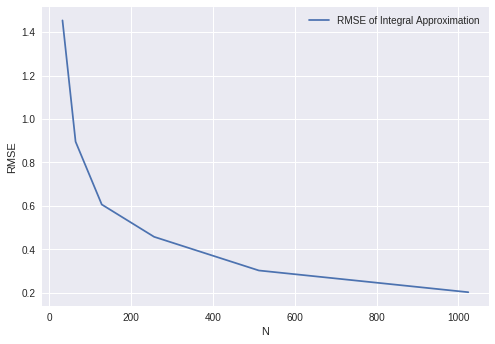

In [0]:
target_vector = []
for i in range(100):
  target_vector.append(1.99)

N_vector = [2**5, 2**6, 2**7, 2**8, 2**9, 2**10]
RMSE_vector = [rmse_of_vector(master_array[:,0],target_vector),
              rmse_of_vector(master_array[:,1],target_vector),
              rmse_of_vector(master_array[:,2],target_vector),
              rmse_of_vector(master_array[:,3],target_vector),
              rmse_of_vector(master_array[:,4],target_vector),
              rmse_of_vector(master_array[:,5],target_vector)]

plt.plot(N_vector,RMSE_vector,label="RMSE of Integral Approximation")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.legend()

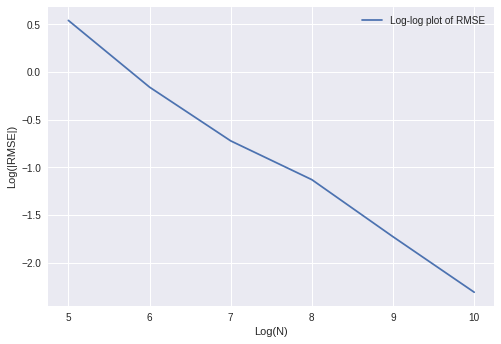

In [0]:
nn = np.log2(N_vector)
yy = np.log2(np.abs(RMSE_vector))

plt.plot(nn,yy,label="Log-log plot of RMSE")
plt.xlabel("Log(N)")
plt.ylabel("Log(|RMSE|)")
plt.legend()

In [0]:
out_2 = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out_2[0]))

----->>>the convergence order is 0.5534277381740489


Display the output of the various importance sampling integral calls to verify.

In [0]:
m = 500
vector = np.zeros((m,1))
for i in range(m):
  vector[i,0] = importance_sampling_integral(2**10)

np.mean(vector)

1.9902306445312503

This output is close to 1.99, which is what we wanted to see.

#Suggesting a New PDF

As we mentioned in lecture, a higher weight on the first indicator will yield better results. To be exact, we found that having the $p_{1}(x)$ function be such that

$$p_{1} = \frac{1}{C}(100\cdot I_{(0,1/100]}(x)+1\cdot I_{(1/100,1)}(x))$$

Yields the best results, as it minimizes the MSE. The relevant $C$ here is $C=\frac{199}{100}$, so $\frac{1}{C}=\frac{100}{199}$. Compute $F_{2}^{-1}$ to be able to code.

For $x \leq 0.01$:

$$F_{2}(x) = 100*x*\frac{1}{C}\mid_{0}^{x} = \frac{10,000}{199}x$$

For $x > 0.01$, the second integral would yield (by math from first section):

$$F_{2}(x) = \frac{1}{C} * [x-\frac{1}{100}] = \frac{100}{199} * x - \frac{100}{199}*\frac{1}{100} = \frac{100}{199}x - \frac{1}{199}$$

To this, we must add $100 * \frac{100}{199} * \frac{1}{100} = \frac{100}{199}$:

$$\rightarrow F_{2}(x) = \frac{100x-1}{199}x + \frac{100}{199} = \frac{100x + 99}{199}$$

Thus we have $F_{2}(x) = $

$$F_{2}(x) = 0, x \leq 0 $$

$$F_{2}(x) = \frac{10,000x}{199},  0\leq x\leq \frac{1}{100}$$

$$F_{2}(x) = \frac{100x + 99}{199}, \frac{1}{100}\leq x \leq 1$$

$$F_{2}(x) = 1, x > 1 $$

Thus, find the inverse.

For $x \leq 0.01$:

$$x = \frac{10,000}{199}y \rightarrow y = \frac{199}{10,000}x, 0 \leq x \leq \frac{100}{199}$$

For $x > 0.01$:

$$x = \frac{100y + 99}{199} \rightarrow x - \frac{99}{199} = \frac{100}{199}y \rightarrow y = \frac{199}{100} * (x-\frac{99}{199})$$

$$\rightarrow y = \frac{199}{100}x - \frac{99}{100} = \frac{199x-99}{100}, \frac{100}{199} < x \leq 1$$

Thus, $F_{2}^{-1}(x) = $

$$F_{2}^{-1}(x) = \frac{199}{10,000}x, 0\leq x\leq \frac{100}{199} $$

$$F_{2}^{-1}(x) = \frac{199x-99}{100},  \frac{100}{199} \leq x \leq 1$$

Now, create new finv(x) function and repeat process.

In [0]:
def new_finv_hw6_2(x):
  if x <= 100/199:
    return x * 199/10000
  else:
    return (199/100)*x - 0.99

In [0]:
def optimal_importance_sampling_integral(n):
  # Generate iid p_1 samples, denoted by X_i.
  x = inverse_transform_sampling(new_finv_hw6_2,n)
  
  # Generate values for h(X) and p_1(x).
  h = np.zeros((n,1))
  p_1 = np.zeros((n,1))
  
  for i in range(n):
    if x[i,0] <= 0.01:
      h[i,0] = 100
      p_1[i,0] = 100*100/199
    else:
      h[i,0] = 1
      p_1[i,0] = 1*100/199
      
  # Compute the average of the integrand h adjusted by likelyhood ratio.

  # Here, p(X_i) = 1 for all X as noted in lecture.
  # Thus, the summation will simplify down somewhat to just be the sum of h(X_i) / p_1(X_i).
  
  alpha_bar = np.zeros((n,1))
  for i in range(n):
    alpha_bar[i,0] = h[i,0] / p_1[i,0]
  
  return sum(alpha_bar)/n

In [0]:
# m is batch number, i_lower and i_upper set bounds of range.
m = 100

# Create main array to store all outputs in.
new_master_array = np.zeros((m,6))

# Populate array with outputs of omc_integral
for i in range(5,11): #Use 11 as upper bound so range goes to 10
    for j in range(m):
        new_master_array[j,i-5] = optimal_importance_sampling_integral(2**i)

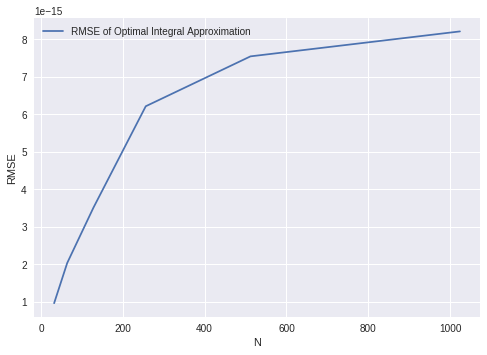

In [0]:
N_vector = [2**5, 2**6, 2**7, 2**8, 2**9, 2**10]
New_RMSE_vector = [rmse_of_vector(new_master_array[:,0],target_vector),
              rmse_of_vector(new_master_array[:,1],target_vector),
              rmse_of_vector(new_master_array[:,2],target_vector),
              rmse_of_vector(new_master_array[:,3],target_vector),
              rmse_of_vector(new_master_array[:,4],target_vector),
              rmse_of_vector(new_master_array[:,5],target_vector)]

plt.plot(N_vector,New_RMSE_vector,label="RMSE of Optimal Integral Approximation")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.legend()

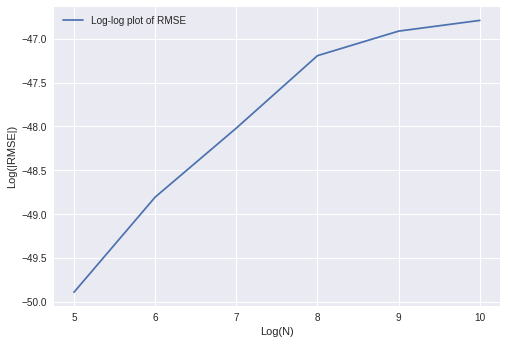

In [0]:
nn = np.log2(N_vector)
yy = np.log2(np.abs(New_RMSE_vector))

plt.plot(nn,yy,label="Log-log plot of RMSE")
plt.xlabel("Log(N)")
plt.ylabel("Log(|RMSE|)")
plt.legend()

In [0]:
out_2 = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out_2[0]))

----->>>the convergence order is -0.6286128225191874


In [0]:
m = 500
vector = np.zeros((m,1))
for i in range(m):
  vector[i,0] = optimal_importance_sampling_integral(2**10)

np.mean(vector)

1.9900000000000087

The results all work out but I'm not sure why the RMSE is increasing as Log(N) goes up, nor am I sure why the convergence order is negative. My best guess would probably be, given how close to 1.99 the mean of the above set of tests is, that I'm running up against the machine limit of the system and thus machine approximation error is overcrowding my results.